# Student's information

* Name: Hany Hamed
* Group: BS18-ROB
* Assignment 1


# Task 1

Documentation


In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

TODO: Explain the data

In [3]:
# Synthesize the data
rng = np.random.RandomState(1)
x = 10*rng.rand(100)
y = np.sin(x) + 0.1 * rng.randn(100)

X_test = np.linspace(0, 10, 100)

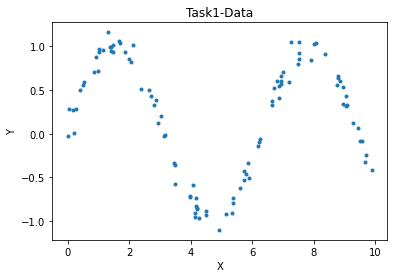

In [4]:
# Display the data
plt.scatter(x, y, marker=".", label="Train-data")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Task1-Data")
plt.show()

From the display of the data, we can exculude the linear models, and the data looks like sinisoid wave which means that a polynomial model will work better than linear.

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
TODO: report each std and mse in each fold for each degree

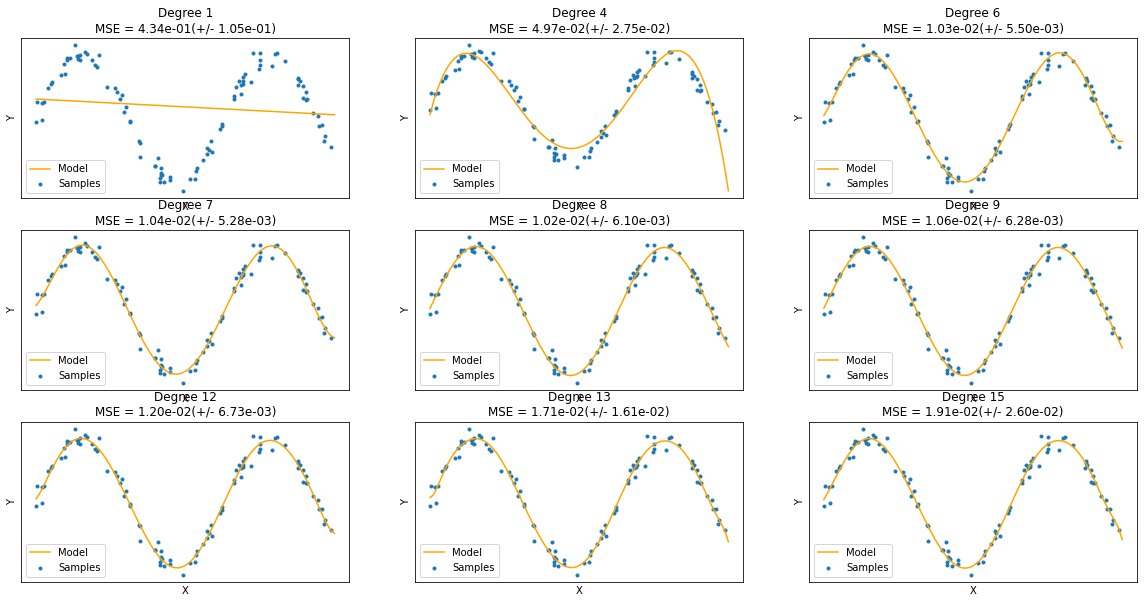

In [13]:
degrees = [1, 4, 6, 7, 8, 9, 12, 13, 15]
plt.figure(figsize=(20, 10))

def polynomial_regression_pipeline(deg):
    polynomial_features = PolynomialFeatures(degree=deg, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(x[:, np.newaxis], y)
    #Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, x[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)
    return pipeline, scores

mse = []
std = []
for i, deg in enumerate(degrees):
    rows = len(degrees)//3
    cols = len(degrees)//rows
    ax = plt.subplot(rows, cols, i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    pipeline, scores = polynomial_regression_pipeline(deg)
    
    y_test_pred = pipeline.predict(X_test[:, np.newaxis])
    
    plt.plot(X_test, y_test_pred, color='orange', label= "Model")
    plt.scatter(x, y, marker='.', label="Samples")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(loc="best")
    mse.append(-scores.mean())
    std.append(scores.std())
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(deg, -scores.mean(), scores.std()))
plt.show()

In [122]:
TODO: Plot the best mode with degreee 8 with the test data too  degree6

SyntaxError: invalid syntax (<ipython-input-122-4db736405190>, line 1)

In [ ]:
TODO: Best model is with Degree 6/8 (Documentation) and plot

In [14]:
for i,deg in enumerate(degrees):
    print("{:}. Model with degree({:}) -> MSE = {:.2e}, std = {:.2e}".format(i+1, deg, mse[i], std[i]))

1. Model with degree(1) -> MSE = 4.34e-01, std = 1.05e-01
2. Model with degree(4) -> MSE = 4.97e-02, std = 2.75e-02
3. Model with degree(6) -> MSE = 1.03e-02, std = 5.50e-03
4. Model with degree(7) -> MSE = 1.04e-02, std = 5.28e-03
5. Model with degree(8) -> MSE = 1.02e-02, std = 6.10e-03
6. Model with degree(9) -> MSE = 1.06e-02, std = 6.28e-03
7. Model with degree(12) -> MSE = 1.20e-02, std = 6.73e-03
8. Model with degree(13) -> MSE = 1.71e-02, std = 1.61e-02
9. Model with degree(15) -> MSE = 1.91e-02, std = 2.60e-02


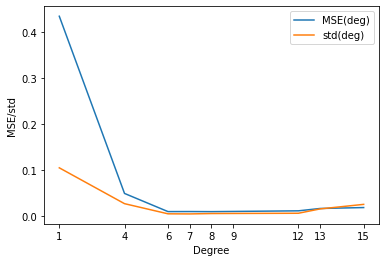

In [15]:
plt.xticks(degrees)
plt.plot(degrees, mse, label= "MSE(deg)")
plt.plot(degrees, std, label= "std(deg)")
plt.xlabel('Degree')
plt.ylabel('MSE/std')
plt.legend(loc="best")
plt.show()

In [ ]:
TODO: use L2 Ridge, L1 Lasso to see if it helps or not, finish it, with ridge on 8 is much better

In [16]:
from sklearn.linear_model import Lasso, Ridge

1. Model with degree(6) -> MSE = 1.03e-02, std = 5.50e-03
1. Model with degree(6), with Lasso -> MSE = 1.60e-01, std = 7.35e-02
2. Model with degree(6), with Ridge -> MSE = 1.02e-02, std = 5.52e-03
1. Model with degree(8) -> MSE = 1.02e-02, std = 6.10e-03
1. Model with degree(8), with Lasso -> MSE = 1.49e-01, std = 5.85e-02
2. Model with degree(8), with Ridge -> MSE = 9.94e-03, std = 5.61e-03


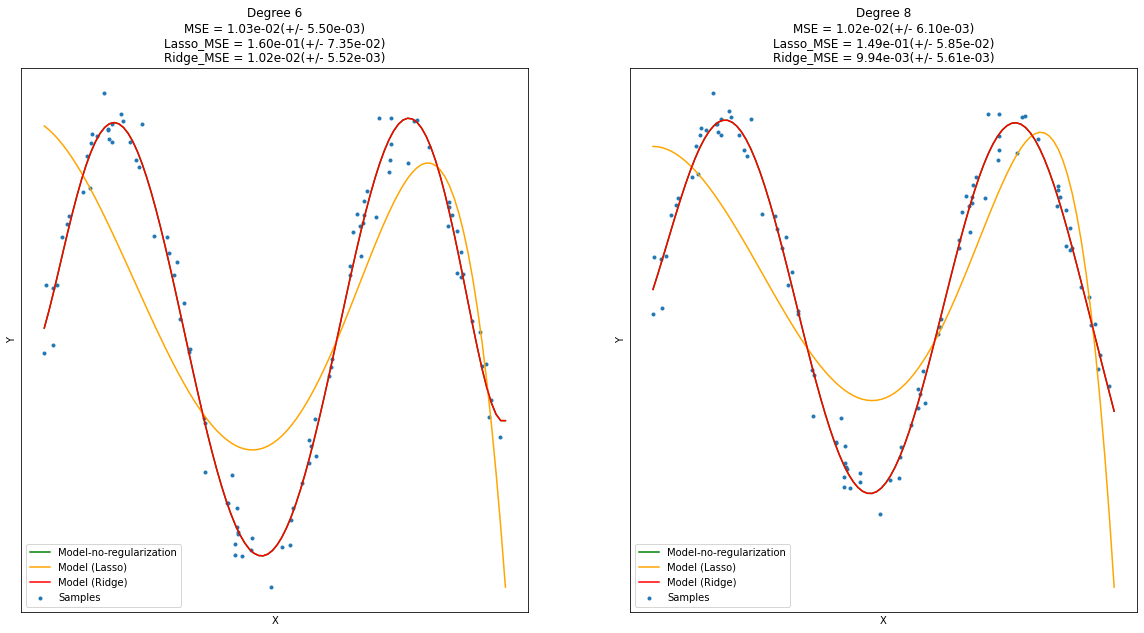

In [23]:
#Evaluate the models using crossvalidation
degrees = [6, 8]


def regularization_pipeline(regularizor, degree):
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("regularizor", regularizor)])
    pipeline.fit(x[:, np.newaxis], y)
    scores = cross_val_score(pipeline, x[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)
    return pipeline, scores

plt.figure(figsize=(20, 10))
for i, deg in enumerate(degrees):
    rows = 1
    cols = 2
    ax = plt.subplot(rows, cols, i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    regression, scores = polynomial_regression_pipeline(deg)
    lasso, lasso_scores = regularization_pipeline(Lasso(alpha=0.001), deg)
    ridge, ridge_scores = regularization_pipeline(Ridge(alpha=0.1), deg)

    y_test_pred = regression.predict(X_test[:, np.newaxis])
    y_test_pred_lasso = lasso.predict(X_test[:, np.newaxis])
    y_test_pred_ridge = ridge.predict(X_test[:, np.newaxis])

    print("{:}. Model with degree({:}) -> MSE = {:.2e}, std = {:.2e}".format(1, deg, -scores.mean(), scores.std()))
    print("{:}. Model with degree({:}), with Lasso -> MSE = {:.2e}, std = {:.2e}".format(1, deg, -lasso_scores.mean(), lasso_scores.std()))
    print("{:}. Model with degree({:}), with Ridge -> MSE = {:.2e}, std = {:.2e}".format(2, deg, -ridge_scores.mean(), ridge_scores.std()))

    plt.plot(X_test, y_test_pred_ridge, color='g', label= "Model-no-regularization")
    plt.plot(X_test, y_test_pred_lasso, color='orange', label= "Model (Lasso)")
    plt.plot(X_test, y_test_pred_ridge, color='red', label= "Model (Ridge)")
    plt.scatter(x, y, marker='.', label="Samples")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xticks()
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})\nLasso_MSE = {:.2e}(+/- {:.2e})\nRidge_MSE = {:.2e}(+/- {:.2e})".format(deg, -scores.mean(), scores.std(), -lasso_scores.mean(), lasso_scores.std(),-ridge_scores.mean(), ridge_scores.std()))

plt.show()

Comment about using regularization works or not

In [ ]:
Plot the best model of lasso and ridge with the best model of polynomial regression

# Task2

Steps for preprocessing with documentation

In [266]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler



%matplotlib inline

In [241]:
data = pd.read_csv('./data/banking.csv')

In [242]:
data.loc[:,:"nr_employed"].head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,68,8,999.0,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1
6,37,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,204,1,999.0,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1
7,39,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,191,1,999.0,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,174,1,NaN,1,success,-2.9,92.963,-40.8,1.266,5076.2
9,27,blue-collar,single,basic.4y,no,yes,no,cellular,apr,thu,191,2,999.0,1,failure,-1.8,93.075,-47.1,1.410,5099.1


In [243]:
# Drop unncessary data: contact, month, day_of_week, (default, : not sure)
new_data = data.drop(["contact", "month", "day_of_week"], axis=1)

In [244]:
X = new_data.loc[:, :'nr_employed']
Y = new_data['y']

In [186]:
# data.head(10)
X.head(10)
# Y.head(5)

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,blue-collar,married,basic.4y,unknown,yes,no,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
1,53,technician,married,unknown,no,no,no,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8
2,28,management,single,university.degree,no,yes,no,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6
3,39,services,married,high.school,no,no,no,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
4,55,retired,married,basic.4y,no,yes,no,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2
5,30,management,divorced,basic.4y,no,yes,no,68,8,999.0,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1
6,37,blue-collar,married,basic.4y,no,yes,no,204,1,999.0,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1
7,39,blue-collar,divorced,basic.9y,no,yes,no,191,1,999.0,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
8,36,admin.,married,university.degree,no,no,no,174,1,NaN,1,success,-2.9,92.963,-40.8,1.266,5076.2
9,27,blue-collar,single,basic.4y,no,yes,no,191,2,999.0,1,failure,-1.8,93.075,-47.1,1.410,5099.1


In [ ]:
Why we don't need label encoding here as there is no ordinal data, only for the education and maybe for poutcome

In [245]:
# One-hot encoding for poutcome, (day_of_week, month (deleted)), marital, job, default, housing, loan
# Label encoding for education and maybe poutcome
ohe_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
le_encoder = LabelEncoder()

ohe_features = ["poutcome", "education", "marital", "job", "default", "housing", "loan"]
# le_features = [{"education":[{"basic.4y":1, "basic.9y":2, "high.school":3, "university.degree":4}]}]
le_features = ["education"]

ohe_encoder.fit(X[ohe_features])
le_encoder.fit(X[le_features])


def ohe_encoding(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    new_cols = pd.DataFrame(new_feats, dtype=int, columns=encoder.get_feature_names(features_name))
    new_df = pd.concat([df, new_cols], axis=1)    
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df

X = ohe_encoding(X, ohe_features, ohe_encoder)
# X = encoding(X, le_features, le_encoder)
# print(X.head(5))

/home/hany606/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [246]:
X.head(5)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,job_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,1,0,0,0,1,1,0,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,1,0,0,1,0,0,1,0,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,1,0,0,0,0,1,1,0,0
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,1,0,0,1,0,0,1,0,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,1,0,0,0,0,1,1,0,0


In [265]:
# Imputation
def count_nans(df):
    return pd.isna(df).sum().sum()

print("Number of nans in X: {:}".format(count_nans(X)))
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X)
X_imputed = imp_mean.transform(X)
print("Number of nans in X: {:}".format(count_nans(X_imputed)))


Number of nans in X: 4
Number of nans in X: 0


In [ ]:
Why I am choosing this feature scalling

In [267]:
# Feature scalling
robust_scalar = RobustScaler()
robust_scalar.fit(X_imputed)
X_imputed = robust_scalar.transform(X_imputed)


In [ ]:
Exlain the splitting percentages splitting percentages (explain the data leakage and the idea of validation)

In [269]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=123)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/8, random_state=123)

In [ ]:
# Set the possible values for the parameters size of the penalty(l1,l2), type of solver: (liblinear, lbfgs), classifier_C: np.logspace(−4, 4, 20)
# 2*n,2,1

"To choose the best hyper-parameters for your model, you should use Grid-Search-CV.
That is, you should try differnet variations of Logistic Regression using variations with respect to size of penalty [’l1’, ’l2’], and type of solver used : [’liblinear’, ’lbfgs’], classif ier_C :
np.logspace(−4, 4, 20).

Grid-Search: It is an exhaustive hyper-parameter tuning algorithm that checks all the
possible hyper-parameter combinations and chooses the best one of them. For evaluation
of every set of hyper-parameters, Grid-Search- CV uses cross-validation to evaluate the
model’s performance. You can refer to these links for more information: GridSearchCV or
LogisticRegressionCV
After you have found the best set of hyper-parameters for the model, you will evaluate
it on the separate test data-set and report: Accuracy, Precision, and Recall."

In [ ]:
# Split the data to train, test, validation (60, 20 ,20)